# <center>Решающие деревья

## План

1. Деревья решений
    - Алгоритм построения дерева
    - Энтропия и деревья принятия решений"
    - Критерии качества разбиения в задаче классификации
2. Практические задачи
    - Игрушечный пример: классификация желтых и красных точек
    - Решающее дерево для кредитного скоринга
    - Классификация рукописных цифр (MNIST)
3. Плюсы и минусы решающих деревьев
4. Резюме

## Дерево решений 
Деревья решений используются в повседневной жизни в самых разных областях человеческой деятельности, порой и очень далеких от машинного обучения. Деревом решений можно назвать наглядную инструкцию, что делать в какой ситуации. Приведем пример из области консультирования научных сотрудников института. Высшая Школа Экономики выпускает инфо-схемы, облегчающие жизнь своим сотрудникам. Вот фрагмент инструкции по публикации научной статьи на портале института.

![img](https://habrastorage.org/files/401/8cd/bea/4018cdbea7a64306be94ed784fce4a06.png)<br>
В терминах машинного обучения можно сказать, что это элементарный классификатор, который определяет форму публикации на портале (книга, статья, глава книги, препринт, публикация в "НИУ ВШЭ и СМИ") по нескольким признакам: типу публикации (монография, брошюра, статья и т.д.), типу издания, где опубликована статья (научный журнал, сборник трудов и т.д.) и остальным.

Зачастую дерево решений служит обобщением опыта экспертов, средством передачи знаний будущим сотрудникам или моделью бизнес-процесса компании. Например, до внедрения масштабируемых алгоритмов машинного обучения в банковской сфере задача кредитного скоринга решалась экспертами. Решение о выдаче кредита заемщику принималось на основе некоторых интуитивно (или по опыту) выведенных правил, которые можно представить в виде дерева решений.
<img src="https://habrastorage.org/files/194/9b6/ae9/1949b6ae97ab4fc9b1a37fbf182eda8f.gif"/><br>
В этом случае можно сказать, что решается задача бинарной классификации (целевой класс имеет два значения: "Выдать кредит" и "Отказать") по признакам "Возраст", "Наличие дома", "Доход" и "Образование".

Дерево решений как алгоритм машинного обучения – по сути то же самое: объединение логических правил вида "Значение признака $a$ меньше $x$ И Значение признака $b$ меньше $y$ ... => Класс 1" в структуру данных "Дерево". Огромное преимущество деревьев решений в том, что они легко интерпретируемы, понятны человеку. Например, по схеме на рисунке выше можно объяснить заемщику, почему ему было отказано в кредите. Скажем, потому, что у него нет дома и доход меньше 5000. Как мы увидим дальше, многие другие, хоть и более точные, модели не обладают этим свойством и могут рассматриваться скорее как "черный ящик", в который загрузили данные и получили ответ. В связи с этой "понятностью" деревьев решений и их сходством с моделью принятия решений человеком (можно легко объяснять боссу свою модель), деревья решений получили огромную популярность.

## Как строится дерево решений

В примере с кредитным скорингом мы видели, что решение о выдаче кредита принималось на основе возраста, наличия недвижимости, дохода и других. Но какой признак выбрать первым? Для этого рассмотрим пример попроще, где все признаки бинарные.

Здесь можно вспомнить игру "20 вопросов", которая часто упоминается во введении в деревья решений. Наверняка каждый в нее играл. Один человек загадывает знаменитость, а второй пытается отгадать, задавая только вопросы, на которые можно ответить "Да" или "Нет" (опустим варианты "не знаю" и "не могу сказать"). Какой вопрос отгадывающий задаст первым делом? Конечно, такой, который сильнее всего уменьшит количество оставшихся вариантов. К примеру, вопрос "Это Анджелина Джоли?" в случае отрицательного ответа оставит более 6 миллиардов вариантов для дальнейшего перебора (конечно, поменьше, не каждый человек – знаменитость, но все равно немало), а вот вопрос "Это женщина?" отсечет уже около половины знаменитостей. То есть, признак "пол" намного лучше разделяет выборку людей, чем признак "это Анджелина Джоли", "национальность-испанец" или "любит футбол". Это интуитивно соответствует понятию прироста информации, основанного на энтропии.

#### Энтропия
Энтропия Шеннона определяется для системы с $N$ возможными состояниями следующим образом:

$$\Large S = -\sum_{i=1}^{N}p_ilog_2p_i,$$

где  $p_i$ – вероятности нахождения системы в $i$-ом состоянии. Это очень важное понятие, используемое в физике, теории информации и других областях. Опуская предпосылки введения (комбинаторные и теоретико-информационные) этого понятия, отметим, что, интуитивно, энтропия соответствует степени хаоса в системе. Чем выше энтропия, тем менее упорядочена система и наоборот. Это поможет там формализовать "эффективное разделение выборки", про которое мы говорили в контексте игры "20 вопросов".

<h4>Задача</h4>
Для иллюстрации того, как энтропия поможет определить хорошие признаки для построения дерева, приведем тот же игрушечный пример, что в статье <a href="https://habrahabr.ru/post/171759/">"Энтропия и деревья принятия решений"</a>. Будем предсказывать цвет шарика по его координате. 
<img src="https://habrastorage.org/files/c96/80a/a4b/c9680aa4babc40f4bbc8b3595e203979.png"/><br>

Здесь 9 синих шариков и 11 желтых. Если мы наудачу вытащили шарик, то он с вероятностью   $p_1=\frac{9}{20}$ будет синим и с вероятностью  $p_2=\frac{11}{20}$ – желтым. Посчитайте энтропию этого состояния  $S_0$. 

<font color='red'>Вопрос 1. </font> $S_0 = ...$ <здесь должно быть Ваше решение>

Теперь посмотрим, как изменится энтропия, если разбить шарики на две группы – с координатой меньше либо равной 12 и больше 12.
<img src="https://habrastorage.org/files/186/444/a8b/186444a8bd0e451c8324ca8529f8d4f4.png"/><br>

В левой группе оказалось 13 шаров, из которых 8 синих и 5 желтых. Энтропия левой группы:

<font color='red'>Вопрос 2. </font> $S_1 = ...$ <здесь должно быть Ваше решение>

В правой группе оказалось 7 шаров, из которых 1 синий и 6 желтых. Энтропия правой группы:

<font color='red'>Вопрос 3. </font> $S_2 = ...$ <здесь должно быть Ваше решение>

##### Уменьшилась или увеличилась энтропия в обеих группах по сравнению с начальным состоянием?

Поскольку энтропия – по сути степень хаоса (или неопределенности) в системе, уменьшение энтропии называют приростом информации. Формально прирост информации (information gain, IG) при разбиении выборки по признаку $Q$ (в нашем примере это признак "$x \leq 12$") определяется как 
$$\Large IG(Q) = S_O - \sum_{i=1}^{q}\frac{|N_i|}{N}S_i,$$
где $q$ – число групп после разбиения, $N_i$ – число элементов выборки, у которых признак $Q$ имеет $i$-ое значение. В нашем случае после разделения получилось две группы ($q = 2$) – одна из 13 элементов ($N_1 = 13$), вторая – из 7 ($N_2 = 7$). Посчитайте прирост информации этого разбиения:

<font color='red'> Вопрос 4. </font>  $\large IG("x \leq 12") = ... $


Получается, разделив шарики на две группы по признаку "координата меньше либо равна 12", мы уже получили более упорядоченную систему, чем в начале. Продолжим деление шариков на группы до тех пор, пока в каждой группе шарики не будут одного цвета.  
<img src="https://habrastorage.org/files/dae/a88/2b0/daea882b0a8e4ef4b23325c88f0353a1.png"/><br>

В итоге мы построили дерево решений, предсказывающее цвет шарика по его координате. Отметим, что такое дерево решений может плохо работать для новых объектов (определения цвета новых шариков), поскольку оно идеально подстроилось под обучающую выборку (изначальные 20 шариков). Для классификации новых шариков лучше подойдет дерево с меньшим числом "вопросов", или разделений, пусть даже оно и не идеально разбивает по цветам обучающую выборку.

#### Другие критерии качества разбиения в задаче классификации

Мы разобрались, в том, как понятие энтропии позволяет формализовать представление о качестве разбиения в дереве. Но это всего-лишь эвристика, существуют и другие:

 - Неопределенность Джини (Gini impurity):  $G = 1 - \sum\limits_k (p_k)^2$. Максимизацию этого критерия можно интерпретировать как максимизацию числа пар объектов одного класса, оказавшихся в одном поддереве. Подробнее об этом (как и обо многом другом) можно узнать из [репозитория](https://github.com/esokolov/ml-course-msu) Евгения Соколова. Не путать с индексом Джини! Подробнее об этой путанице – в [блогпосте](https://alexanderdyakonov.wordpress.com/2015/12/15/%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%BC%D1%8C%D1%82%D0%B5%D1%81%D1%8C-%D0%B4%D0%B6%D0%B8%D0%BD%D0%B8/) Александра Дьяконова
 - Ошибка классификации (misclassification error):  $E = 1 - \max\limits_k p_k$
 
 
На практике ошибка классификации почти не используется, а неопределенность Джини и прирост информации работают почти одинаково.

В случае задачи бинарной классификации ($p_+$ – вероятность объекта иметь метку +) энтропия и неопределенность Джини примут следующий вид:<br><br>
$$ S = -p_+ \log_2{p_+} -p_- \log_2{p_-} = -p_+ \log_2{p_+} -(1 - p_{+}) \log_2{(1 - p_{+})};$$
$$ G = 1 - p_+^2 - p_-^2 = 1 - p_+^2 - (1 - p_+)^2 = 2p_+(1-p_+).$$

Когда мы построим графики этух двух функций от аргумента $p_+$, то увидим, что график энтропии очень близок к графику удвоенной неопределенности Джини, и поэтому на практике эти два критерия "работают" почти одинаково.

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

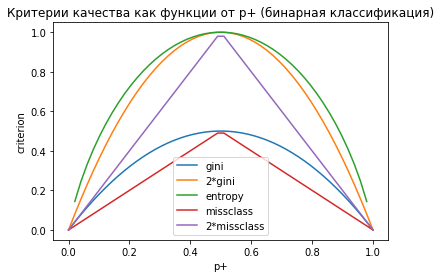

In [2]:
plt.rcParams['figure.figsize'] = (6,4)
xx = np.linspace(0,1,50)
plt.plot(xx, [2 * x * (1-x) for x in xx], label='gini')
plt.plot(xx, [4 * x * (1-x) for x in xx], label='2*gini')
plt.plot(xx, [-x * np.log2(x) - (1-x) * np.log2(1 - x)  for x in xx], label='entropy')
plt.plot(xx, [1 - max(x, 1-x) for x in xx], label='missclass')
plt.plot(xx, [2 - 2 * max(x, 1-x) for x in xx], label='2*missclass')
plt.xlabel('p+')
plt.ylabel('criterion')
plt.title('Критерии качества как функции от p+ (бинарная классификация)')
plt.legend();

Теперь перейдем к практике.

### Практические задачи

Импорт библиотек, которые могут нам дальше понадобиться:

In [4]:
from __future__ import division, print_function

# отключим всякие предупреждения
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt

#### Игрушечный пример
Рассмотрим пример применения дерева решений из библиотеки Scikit-learn для синтетических данных. Сгенерируем данные. Два класса будут сгенерированы из двух нормальных распределений с разными средними.

In [0]:
# первый класс
np.random.seed(7)

train_data = # your code here
train_labels = # your code here

# добавляем второй класс
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей красивой визуализации.

In [0]:
def get_grid(data, eps=0.01):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1 # задаем границы решетки по оси X
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1 # задаем границы решетки по оси Y
    return np.meshgrid(
        np.arange(x_min, x_max, eps),
        np.arange(y_min, y_max, eps)
    ) # функция возвращает решетку с заданными границами

Отобразим данные. Неформально, задача классификации в этом случае – построить какую-то "хорошую" границу, разделяющую 2 класса (красные точки от желтых). Если утрировать, то машинное обучение в этом случае сводится к тому, как выбрать хорошую разделяющую границу. Возможно,  прямая будет слишком простой границей, а какая-то сложная кривая, огибающая каждую красную точку – будет слишком сложной и будем много ошибаться на новых примерах из того же распределения, из которого пришла обучающая выборка. Интуиция подсказывает, что хорошо на новых данных будет работать какая-то *гладкая* граница, разделяющая 2 класса, или хотя бы просто прямая (в $n$-мерном случае - гиперплоскость). 

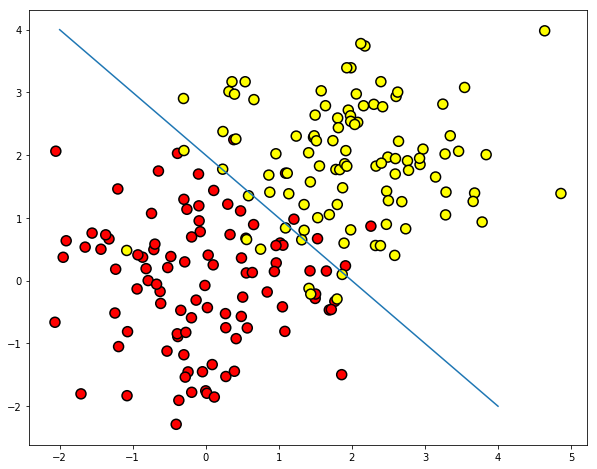

In [0]:
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5) # рисуем выборку
plt.plot(range(-2,5), range(4,-3,-1)); #рисуем разделяющую прямую

Попробуем разделить эти два класса, обучив дерево решений. В дереве будем использовать параметр `max_depth`, ограничивающий глубину дерева. Визуализируем полученную границу разделения класссов.

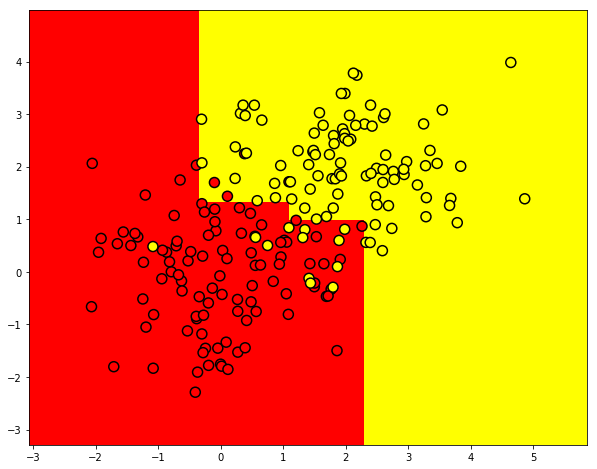

In [0]:
from sklearn.tree import DecisionTreeClassifier

# параметр min_samples_leaf указывает, при каком минимальном количестве
# элементов в узле он будет дальше разделяться
# параметр msx_depth указывает максимальную глубину дерева
clf_tree = # your code here

# обучаем дерево
# your code here

# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape) #предсказание
plt.pcolormesh(xx, yy, predicted, cmap='autumn') # задаем цветовую схему "осень"
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5); #рисуем выборку

А как выглядит само построенное дерево? Видим, что дерево "нарезает" пространство на 7 прямоугольников (в дереве 7 листьев). В каждом таком прямоугольнике прогноз дерева будет константным, по превалированию объектов того или иного класса.

In [0]:
# используем .dot формат для визуализации дерева
from sklearn.tree import export_graphviz # импортируем библиотеку для визуализации дерева

# рисуем структуру полученного дерева
export_graphviz(
    clf_tree, # дерево
    feature_names=['x1', 'x2'], # названия признаков
    out_file='img_trees/small_tree.dot', # путь до файла, куда сохраняем дерево
    filled=True
)

# конвертируем файл .dot в картинку .png
# img_trees/small_tree.dot - путь до файла с разрешением .dot
# img_trees/small_tree.png - путь, куда нужно сохранить картинку
!dot -Tpng small_tree.dot -o small_tree.png

# удаляем файл с расширением .dot
!rm small_tree.dot

Ссылка на online graphviz

<img src='small_tree.png'>

### <center> В случае, если команда `dot` не отработала, воспользуйтесь онлайн-конвертером: http://www.webgraphviz.com </center>

Как "читается" такое дерево?

В начале было 200 объектов, 100 – одного класса и 100 – другого. Энтропия начального состояния была максимальной – 1. Затем было сделано разбиение объектов на 2 группы в зависимости от сравнения признака $x_1$ со значением $1.1034$ (найдите этот участок границы на рисунке выше, до дерева). При этом энтропия и в левой, и в правой группе объектов уменьшилась. И так далее, дерево строится до глубины 3. При такой визуализации чем больше объектов одного класса, тем  цвет вершины ближе к темно-оранжевому и, наоборот, чем больше объектов второго класса, тем ближе цвет к темно-синему. В начале объектов одного лкасса поровну, поэтому корневая вершина дерева – белого цвета.

### Кредитный скоринг


Рассмотрим решение задачи кредитного скоринга с помощью решающего дерева на игрушечном примере:

In [0]:
data = pd.DataFrame({
    'Возраст': [17,64,18,20,38,49,55,25,29,31,33], 
    'Невозврат кредита': [1,0,1,0,1,0,0,1,1,0,1]
})

In [0]:
data

,Возраст,Невозврат кредита
0,17,1
1,64,0
2,18,1
3,20,0
4,38,1
5,49,0
6,55,0
7,25,1
8,29,1
9,31,0


Отсортируем ее по возрастанию возраста.

In [0]:
data.sort_values('Возраст')

,Возраст,Невозврат кредита
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


Обучим на этих данных дерево решений (без ограничения глубины) и посмотрим на него.

In [0]:
age_tree = DecisionTreeClassifier(random_state=17)

X = data['Возраст'].values.reshape(-1, 1)
Y = data['Невозврат кредита'].values

# your code here
# обучите решающее дерево (age_tree)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

Видим, что дерево задействовало 5 значений, с которыми сравнивается возраст: 43.5, 19, 22.5, 30 и 32 года. Если приглядеться, то это аккурат средние значения между возрастами, при которых целевой класс "меняется" с 1 на 0 или наоборот. Сложная фраза, поэтому пример: 43.5 – это среднее между 38 и 49 годами, клиент, которому 38 лет не вернул кредит, а тот, которому 49 – вернул. Аналогично, 19 лет – среднее между 18 и 20 годами. То есть в качестве порогов для "нарезания" количественного признака, дерево "смотрит" на те значения, при которых целевой класс меняет свое значение. 

Подумайте, почему не имеет смысла в данном случае рассматривать признак "Возраст < 17.5".

In [0]:
# визуализируйте обученное дерево
# your code here

# конвертируем файл age_tree.dot в картинку age_tree.png
# your code here

<img src='age_tree.png'>

Рассмотрим пример посложнее: добавим признак "Зарплата" (тыс. рублей/месяц).

In [0]:
data2 = pd.DataFrame({
    'Возраст':  [17,64,18,20,38,49,55,25,29,31,33], 
    'Зарплата': [25,80,22,36,37,59,74,70,33,102,88], 
    'Невозврат кредита': [1,0,1,0,1,0,0,1,1,0,1]
})

In [0]:
data2

,Возраст,Зарплата,Невозврат кредита
0,17,25,1
1,64,80,0
2,18,22,1
3,20,36,0
4,38,37,1
5,49,59,0
6,55,74,0
7,25,70,1
8,29,33,1
9,31,102,0


Если отсортировать по возрасту, то целевой класс ("Невозврат кредита") меняется (с 1 на 0 или наоборот) 5 раз. А если отсортировать по зарплате – то 7 раз. Как теперь дерево будет выбирать признаки? Посмотрим.

In [0]:
data2.sort_values('Возраст')

,Возраст,Зарплата,Невозврат кредита
0,17,25,1
2,18,22,1
3,20,36,0
7,25,70,1
8,29,33,1
9,31,102,0
10,33,88,1
4,38,37,1
5,49,59,0
6,55,74,0


In [0]:
# отсортируйте данные по зарплате

# your code here

,Возраст,Зарплата,Невозврат кредита
2,18,22,1
0,17,25,1
8,29,33,1
3,20,36,0
4,38,37,1
5,49,59,0
7,25,70,1
6,55,74,0
1,64,80,0
10,33,88,1


In [0]:
X = data2[['Возраст', 'Зарплата']].values
Y = data2['Невозврат кредита'].values

# обучите решающее дерево

# your code here

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [0]:
# визуализируйте обученное дерево

# конвертируем файл с разрешением .dot в картинку с разрешением .png

<img src='age_sal_tree.png'>

Видим, что в дереве задействованы как разбиения по возрасту, так и по зарплате. Причем пороги, с которыми сравниваются признаки: 43.5 и 22.5 года – для возраста и 95 и 30.5 тыс. руб/мес – для зарплаты. И опять можно заметить, что 95 тыс. – это среднее между 88 и 102, при этом человек с зарплатой 88 оказался "плохим", а с 102 – "хорошим". То же самое для 30.5 тыс. То есть перебирались сравнения зарплаты и возраста не со всеми возможными значениями, а только с несколькими.

**Вывод:** самая простая эвристика для обработки количественных признаков в дереве решений: количественный признак сортируется по возрастанию, и в дереве проверяются только те пороги, при которых целевой признак меняет значение. 


### Основные параметры дерева

В принципе дерево решений можно построить до такой глубины, чтоб в каждом листе был ровно один объект. Но на практике это не делается из-за того, что такое дерево будет *переобученным* – оно слишком настроится на обучающую выборку и будет плохо работать на прогноз на новых данных. Где-то внизу дерева, на большой глубине будут появляться разбиения по менее важным признакам. Если утрировать, может оказаться так, что из всех 4 клиентов, пришедших в банк за кредитом в зеленых штанах, никто не вернул кредит. Но мы не хотим, чтобы наша модель классификации порождала такие специфичные правила. 

Основные способы борьбы с переобучением в случае деревьев решений:
 - искусственное ограничение глубины или минимального числа объектов в листе: построение дерева просто в какой-то момент прекращается;
 - стрижка дерева (*pruning*). При таком подходе дерево сначала строится до максимальной глубины, потом постепенно, снизу вверх, некоторые вершины дерева убираются за счет сравнения по качеству дерева с данным разбиением и без него (сравнение проводится с помощью *кросс-валидации*, о которой чуть ниже).

### Класс DecisionTreeClassifier в Scikit-learn
Основные параметры класса [sklearn.tree.DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html):

- `max_depth` – максимальная глубина дерева
- `max_features` - максимальное число признаков, по которым ищется лучшее разбиение в дереве (это нужно потому, что при большом количестве признаков будет "дорого" искать лучшее (по критерию типа прироста информации) разбиение среди *всех* признаков)
- `min_samples_leaf` – минимальное число объектов в листе. У этого параметра есть понятная интерпретация: скажем, если он равен 5, то дерево будет порождать только те классифицирующие правила, которые верны как мимимум для 5 объектов

Параметры дерева надо настраивать в зависимости от входных данных, и делается это обычно с помощью *кросс-валидации*,  про нее чуть ниже.


## Деревья решений в задаче распознавания рукописных цифр MNIST

Теперь посмотрим на изученные 2 алгоритма в реальной задаче. Используемый "встроенные" в `sklearn` данные по рукописным цифрам. Эта задача будет примером, когда метод ближайших соседей работает на удивление хорошо.

In [0]:
from sklearn.datasets import load_digits

Загружаем данные.

In [0]:
data = load_digits()
X, y = data.data, data.target

Картинки здесь представляются матрицей 8 x 8 (интенсивности белого цвета для каждого пикселя). Далее эта матрица "разворачивается" в вектор длины 64, получается признаковое описание объекта.

In [0]:
X[0,:].reshape([8,8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Нарисуем несколько рукописных цифр, видим, что они угадываются.

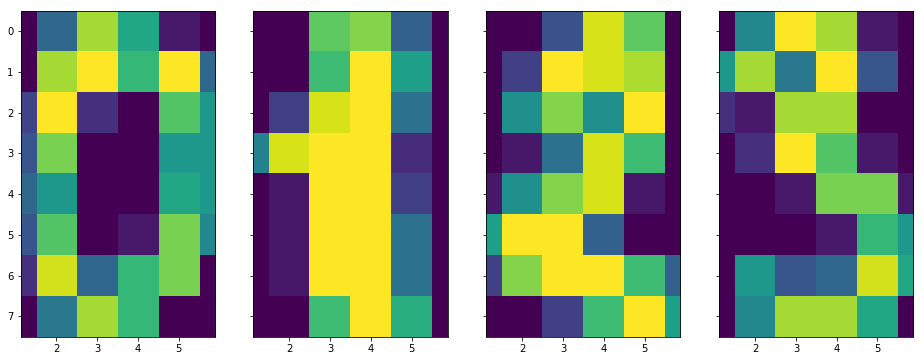

In [0]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,6))
for i in range(4):
    axes[i].imshow(X[i,:].reshape([8,8]));


Посмотрим на соотношение классов в выборке, видим, что примерно поровну нулей, единиц, ..., девяток.

In [0]:
from collections import Counter

# your code here

Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

Выделим 70% выборки (X_train, y_train) под обучение и 30% будут отложенной выборкой (X_holdout, y_holdout). отложенная выборка никак не будет участвовать в настройке параметров моделей, на ней мы в конце, после этой настройки, оценим качество полученной модели.

In [0]:
from sklearn.cross_validation import train_test_split # функция для разделения выборки на обучающую и тестовую выборки

X_train, X_holdout, y_train, y_holdout = train_test_split(
    X,
    y,
    test_size=0.3, # в каком соотношении делить выборку (30% данных пойдет в тестовую выборку - holdout)
    random_state=17
)

Обучим дерево решений и kNN, опять параметры пока наугад берем.

In [0]:
from sklearn.neighbors import KNeighborsClassifier

tree = # your code here
knn = # your code here

In [0]:
%%time
# засечем время, потраченное на обучение дерева

# обучите решающее дерево (tree)

# your code here

CPU times: user 9.34 ms, sys: 1.32 ms, total: 10.7 ms
Wall time: 9.46 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [0]:
%%time
# засечем время, потраченное на обучение KNN

# обучите knn

# your code here

CPU times: user 3.28 ms, sys: 1.83 ms, total: 5.11 ms
Wall time: 13.2 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

Сделаем прогнозы для отложенной выборки. Видим, что метод ближайших соседей справился намного лучше. Но это мы пока выбирали параметры наугад. 

In [0]:
# сделайте прогнозы на отложенной выборке (X_holdout)

tree_pred = # your code here
knn_pred = # your code here

Считаем качество прогнозов:

In [0]:
from sklearn.metrics import accuracy_score

knn_score = # your code here
tree_score = # your code here

print('Решающее дерево:', tree_score)
print('KNN:', knn_score)

Решающее дерево: 0.6666666666666666
KNN: 0.9740740740740741


Дерево работает на порядок хуже, чем KNN. 

Теперь настроим параметры моделей на кросс-валидации.

In [0]:
tree_params = {
    'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
    'max_features': [1, 2, 3, 5, 10, 20 ,30, 50, 64]
}

In [0]:
from sklearn.model_selection import GridSearchCV # автоматический перебор параметров по заданной сетке

tree_grid = GridSearchCV(
    tree, # модель, параметры которой будем подбирать
    tree_params, # список параметров, которые нужно попробовать
    cv=5, # количество частей, на которые делим выборку в кросс-валидации
    n_jobs=-1, # количество потоков, которые будут работать параллельно
               # (-1 означает, что мы не будем ничего запускать параллельно)
    verbose=True # нужно ли в процессе обучения выводить поясняющие сообщения
)

In [0]:
# запускаем перебор параметров
# your code here

Fitting 5 folds for each of 99 candidates, totalling 495 fits


[Parallel(n_jobs=-1)]: Done 495 out of 495 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64], 'max_features': [1, 2, 3, 5, 10, 20, 30, 50, 64]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

Лучшее сочетание параметров и соответствующая средняя доля правильных ответов на кросс-валидации:

In [0]:
print('Лучшее сочетание параметров:', tree_grid.best_params_)
print('Доля правильных ответов дерева с лучшими параметрами на кросс-валидации:', tree_grid.best_score_)

Лучшее сочетание параметров: {'max_depth': 20, 'max_features': 64}
Доля правильных ответов дерева с лучшими параметрами на кросс-валидации: 0.8440731901352426


Считаем качество модели с выбранными параметрами на отложенной выборке (X_holdout):

In [0]:
y_pred = tree_grid.predict(X_holdout)

# посчитайте accuracy (долю правильных ответов) решающего дерева на отложенной выборке (holdout)
# your code here

0.8388888888888889

Это уже не 66%, но и не 97%. Метод ближайших соседей на этом наборе данных работает лучше. В случае одного ближайшего соседа на кросс-валидации достигается почти 99% угадываний.

Посчитаем долю правильных ответов KNN на отложенной выборке и сравним полученные результаты:

In [0]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

# посчитайте accuracy (долю правильных ответов) KNN на отложенной выборке (holdout)
# your code here

0.9833333333333333

Результаты эксперимента:

|     |   CV  | Holdout |  
|-----|:-----:|:-------:|
| **Решающее дерево**  | 0.844 |  0.838  |  
| **kNN** | 0.987 |  0.983  |

Обозначения: 

- CV - средняя доля правильных ответов модели на кросс-валидации.
- Holdout - средняя доля правильных ответов модели на отложенной выборке.
- DT – дерево решений.
- kNN – метод ближайших соседей.


**Вывод** по этому эксперименту (и общий совет): в начале проверяйте на своих данных простые модели – дерево решений и метод ближайших соседей, может оказаться, что уже они работают достаточно хорошо. 

## Плюсы и минусы деревьев решений

**Плюсы:**
 - Порождение четких правил классификации, понятных человеку, например, "если возраст < 25 и интерес к мотоциклам, то отказать в кредите". Это свойство называют интерпретируемостью модели;
 - Деревья решений могут легко визуализироваться, то есть может "интерпретироваться" (строгого определения я не видел) как сама модель (дерево), так и прогноз для отдельного взятого тестового объекта (путь в дереве);
 - Быстрые процессы обучения и прогнозирования;
 - Малое число параметров модели;
 - Поддержка и числовых, и категориальных признаков.
 
**Минусы:**
 - У порождения четких правил классификации есть и другая сторона: деревья очень чувствительны к шумам во входных данных, вся модель может кардинально измениться, если немного изменится обучающая выборка (например, если убрать один из признаков или добавить несколько объектов), поэтому и правила классификации могут сильно изменяться, что ухудшает интерпретируемость модели;
 - Разделяющая граница, построенная деревом решений, имеет свои ограничения (состоит из гиперплоскостей, перпендикулярных какой-то из координатной оси), и на практике дерево решений по качеству классификации уступает некоторым другим методам;
 - Необходимость отсекать ветви дерева (pruning) или устанавливать минимальное число элементов в листьях дерева или максимальную глубину дерева для борьбы с переобучением. Впрочем, переобучение - проблема всех методов машинного обучения;
 - Нестабильность. Небольшие изменения в данных могут существенно изменять построенное дерево решений. С этой проблемой борются с помощью ансамблей деревьев решений (рассмотрим далее);
 - Проблема поиска оптимального дерева решений (минимального по размеру и способного без ошибок классифицировать выборку) NP-полна, поэтому на практике используются эвристики типа жадного поиска признака с максимальным приростом информации, которые не гарантируют нахождения глобально оптимального дерева;
 - Сложно поддерживаются пропуски в данных. Friedman оценил, что на поддержку пропусков в данных ушло около 50% кода CART (классический алгоритм построения деревьев классификации и регрессии – Classification And Regression Trees, в `sklearn` реализована улучшенная версия именно этого алгоритма);
 - Модель умеет только интерполировать, но не  экстраполировать (это же верно и для леса и бустинга на деревьях). То есть дерево решений делает константный прогноз для объектов, находящихся в признаковом пространстве вне параллелепипеда, охватывающего все объекты обучающей выборки. В нашем примере с желтыми и синими шариками это значит, что модель дает одинаковый прогноз для всех шариков с координатой > 19 или < 0.

## Резюме

- Алгоритм построения решающего дерева
- Подсчет энтропии и Information Gain при разбиении выборки
- Обучение решающего дерева
- Подбор оптимальных параметров для дерева
- Решение двух практических задач с помощью решающих деревьев:
    - Кредитный скоринг
    - Классификация рукописных цифр (MNIST)

**Ноутбук составлен по мотивам:**
- [Открытый курс ODS по машинному обучению](https://habr.com/company/ods/blog/322626/)
- [Блог](https://alexanderdyakonov.wordpress.com/2016/11/14/случайный-лес-random-forest/) Александра Дьяконова
- [Курс](https://github.com/esokolov/ml-course-hse) Евгения Соколова по машинному обучению (материалы на GitHub)